In [3]:
import numpy as np
from scipy.special import expit as sigmoid

def generate_data(X, f):
    return f(X)

X = np.linspace(-1,1,50)
f = [lambda x: x**2, lambda x: np.sin(x*np.pi)]

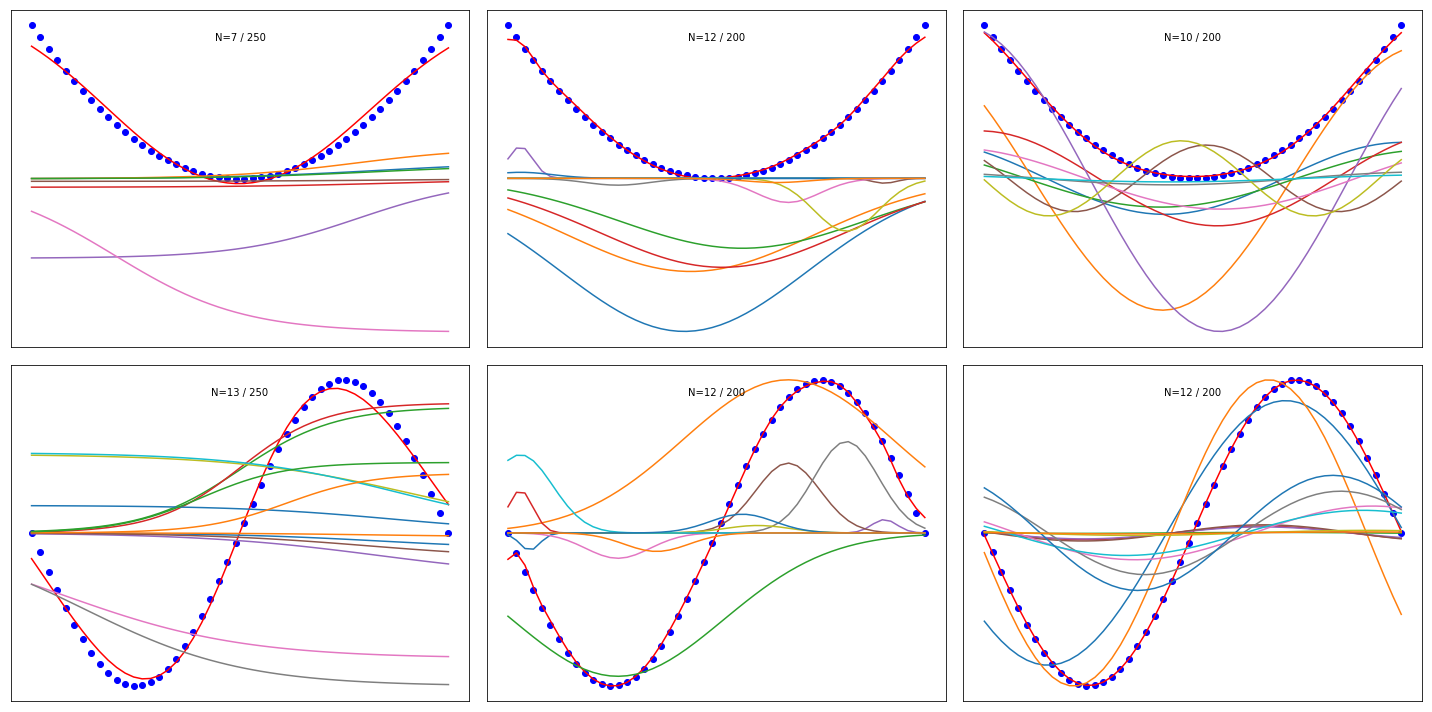

In [5]:
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

def features(X, col):
    if col == 0:  # σ(w x + b)
        w, b = np.meshgrid(np.random.uniform(-5,5,25), np.random.uniform(-2,2,10))
        return sigmoid(np.outer(X, w.ravel()) + b.ravel())
    if col == 1:  # exp(-|x - μ|^2 / σ^2)
        mu, sigma = np.meshgrid(np.random.uniform(-1,1,20), np.exp(np.random.uniform(-5, 0, 10)))
        N = len(mu.ravel())
        return np.exp(-np.square((np.broadcast_to(X, (N,)+X.shape).T - mu.ravel()) / sigma.ravel()))
    if col == 2:  # sin(w x + b)
        w, b = np.meshgrid(np.random.uniform(1,5,20), np.random.uniform(-2,2,10))
        return np.sin(np.outer(X, w.ravel()) + b.ravel())
    
N = 5
reg = Lasso(alpha=1e-3)
fig = plt.figure(figsize=(20,10))
for c in range(3):
    Phi = features(X, c)
    for r in range(2):
        y = generate_data(X, f[r])
        reg.fit(Phi, y)

        ax = fig.add_subplot(2, 3, 1 + r*3+c, xticks=[], yticks=[])
        ax.plot(X, y, 'bo ')
        ax.plot(X, reg.predict(Phi), 'r-')

        nonzero = reg.coef_ != 0 # find all nonzero components
        largest = np.argpartition(np.absolute(reg.coef_),-N)[-N:] # find largest N coefficients
        shown = nonzero
        wmax = np.max(np.absolute(reg.coef_[shown]))

        ys = (Phi * reg.coef_ / wmax)[:,shown]
        ax.plot(X, ys)
        ax.text(0, 0.9, 'N={} / {}'.format(len(reg.coef_[shown]), len(reg.coef_)), ha='center')
plt.tight_layout()
        